In [5]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [24]:
lambdas = [0.0,0.5,1.0,3.0,5.0,10.0,100.0]
linear = LinearRegression()
linear.fit(X_train,y_train)
train = []
test = []
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train,y_train)
    train.append(ridge.score(X_train,y_train))
    test.append(ridge.score(X_test,y_test))

In [25]:
import matplotlib.pyplot as plt

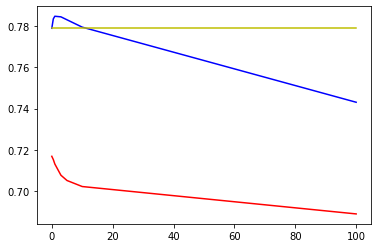

In [26]:
plt.plot(lambdas,train,'r-')
plt.plot(lambdas,test,'b-')
plt.plot(lambdas,[linear.score(X_test,y_test)]*len(train),'y-')
plt.show()

In [27]:
import numpy as np
dados = np.array([1,2,3,4,5])    

In [28]:
def normalizacao(dados):
    minimo = dados.min()
    maximo = dados.max()
    ret = [(x-minimo)/(maximo-minimo) for x in dados]
    return ret

In [29]:
normalizacao(dados)

[0.0, 0.25, 0.5, 0.75, 1.0]

In [30]:
def padronizacao(dados):
    desvio_padrao = dados.std()
    media = dados.mean()
    ret = [(x-media)/desvio_padrao for x in dados]
    return ret

In [32]:
dados_padronizados = np.array(padronizacao(dados))

In [33]:
print(dados_padronizados.mean())
print(dados_padronizados.std())

0.0
0.9999999999999999


In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [55]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [59]:
for i in range(1,11):
    print('Vizinhos:',i)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("Dados sem processamento:",knn.score(X_test,y_test))
    knn.fit(X_train_mm,y_train)
    print("Dados MinMax:",knn.score(X_test_mm,y_test))
    knn.fit(X_train_ss,y_train)
    print("Dados Standard:",knn.score(X_test_ss,y_test))

Vizinhos: 1
Dados sem processamento: 0.34884089194176715
Dados MinMax: 0.6337742736031257
Dados Standard: 0.7813634165890824
Vizinhos: 2
Dados sem processamento: 0.4589068295766857
Dados MinMax: 0.7518395727221387
Dados Standard: 0.8019029577553897
Vizinhos: 3
Dados sem processamento: 0.4898999675487632
Dados MinMax: 0.7678392166633872
Dados Standard: 0.7958922665547864
Vizinhos: 4
Dados sem processamento: 0.5107245301417562
Dados MinMax: 0.7426752855722183
Dados Standard: 0.7780554918685592
Vizinhos: 5
Dados sem processamento: 0.5332200688881714
Dados MinMax: 0.7067731243729541
Dados Standard: 0.7591876652129323
Vizinhos: 6
Dados sem processamento: 0.49081273079097965
Dados MinMax: 0.7032145370992322
Dados Standard: 0.7441831816052906
Vizinhos: 7
Dados sem processamento: 0.4741234273173166
Dados MinMax: 0.7065281831299436
Dados Standard: 0.7390885492805273
Vizinhos: 8
Dados sem processamento: 0.44771565998429086
Dados MinMax: 0.70513602075346
Dados Standard: 0.747424536419581
Vizinhos

In [61]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

In [67]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [68]:
lr = LinearRegression()
ridge = Ridge(alpha=2.0)
lasso = Lasso(alpha=2.0)

In [69]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.717152319168485

In [70]:
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.7079353494207785

In [71]:
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.5900688520432056

In [76]:
lasso.coef_

array([-0.        ,  0.02348663, -0.        ,  0.        , -0.        ,
        0.        ,  0.03020275, -0.        ,  0.17366015, -0.01159106,
       -0.64787846,  0.00819026, -0.79610241])

# Segunda parte da aula

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
X = np.array([1 , 2, 4, 7, 9, 11]).reshape(-1,1)
y = np.array([((x**2) + np.random.normal()*2) for x in X])

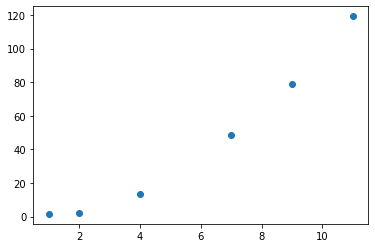

In [90]:
plt.scatter(X,y)
plt.show()

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [100]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [106]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
lr.score(X_test,y_test)

0.7530486007175454


0.6718285149684986

In [107]:
poly = PolynomialFeatures(degree=2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_2,y_train)
print(lr.score(X_train_2,y_train))
lr.score(X_test_2, y_test)

0.9342878751219568


0.8006155567073558

In [108]:
poly = PolynomialFeatures(degree=3)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_3,y_train)
print(lr.score(X_train_3,y_train))
lr.score(X_test_3, y_test)

1.0


-1784.783478311314

In [111]:
X_train_3.shape

(379, 560)

In [112]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [113]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [118]:
C = [0.1,0.5,1,2,10,100,100000]
train = []
test = []
for c in C:
    lr = LogisticRegression(C=c,max_iter=100)
    lr.fit(X_train,y_train)
    train.append(lr.score(X_train,y_train))
    test.append(lr.score(X_test,y_test))

/Users/goncalves/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/goncalves/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

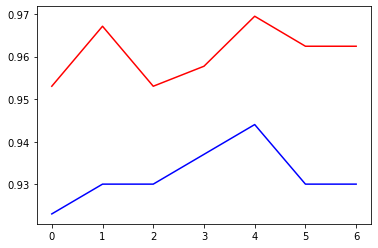

In [120]:
plt.plot(range(0,len(C)),train,'r-')
plt.plot(range(0,len(C)),test,'b-')
plt.show()

In [121]:
from sklearn.svm import SVC

In [128]:
svm = SVC(kernel='linear',C=2.0)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9440559440559441

In [129]:
lr = LogisticRegression(C=2.0)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/Users/goncalves/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9370629370629371